In [ ]:
import numpy as nm  
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

data= pd.read_csv('/content/drive/My Drive/Dataset/Live_20210128.csv')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
data.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [ ]:
data.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [ ]:
data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


In [ ]:
len(data['status_published'].unique())

6913

In [ ]:
data.drop(['status_published'], axis=1, inplace=True)

In [ ]:
data

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,529,512,262,432,92,3,1,1,0
1,2,photo,150,0,0,150,0,0,0,0,0
2,3,video,227,236,57,204,21,1,1,0,0
3,4,photo,111,0,0,111,0,0,0,0,0
4,5,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,89,0,0,89,0,0,0,0,0
7046,7047,photo,16,0,0,14,1,0,1,0,0
7047,7048,photo,2,0,0,1,1,0,0,0,0
7048,7049,photo,351,12,22,349,2,0,0,0,0


In [ ]:
'''
def swap_columns(data, col1, col2):
    col_list = list(data.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    data= data[col_list]
    return data

#swap points and rebounds columns
data= swap_columns(data, 'status_type', 'num_angrys')

#view updated DataFrame
data
'''

"\ndef swap_columns(data, col1, col2):\n    col_list = list(data.columns)\n    x, y = col_list.index(col1), col_list.index(col2)\n    col_list[y], col_list[x] = col_list[x], col_list[y]\n    data= data[col_list]\n    return data\n\n#swap points and rebounds columns\ndata= swap_columns(data, 'status_type', 'num_angrys')\n\n#view updated DataFrame\ndata\n"

In [ ]:
#data['status_type'] = data['status_type'].astype(str).astype(int)

x = data

y = data['status_type']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['status_type'] = le.fit_transform(x['status_type'])
y = le.transform(y)

In [ ]:
data.info()
print(x.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_id      7050 non-null   int64
 1   status_type    7050 non-null   int64
 2   num_reactions  7050 non-null   int64
 3   num_comments   7050 non-null   int64
 4   num_shares     7050 non-null   int64
 5   num_likes      7050 non-null   int64
 6   num_loves      7050 non-null   int64
 7   num_wows       7050 non-null   int64
 8   num_hahas      7050 non-null   int64
 9   num_sads       7050 non-null   int64
 10  num_angrys     7050 non-null   int64
dtypes: int64(11)
memory usage: 606.0 KB
   status_id  status_type  num_reactions  num_comments  num_shares  num_likes  \
0          1            3            529           512         262        432   
1          2            1            150             0           0        150   
2          3            3            227           236         

In [ ]:
cols = x.columns
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
x = ms.fit_transform(x)
x = pd.DataFrame(x, columns=[cols])

In [ ]:
x.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.000000,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.000142,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000284,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.000426,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000567,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(x)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[4.54626777e-01, 3.40500998e-01, 4.30301772e-02, 7.66608414e-04,
        7.70054301e-04, 4.25111817e-02, 2.15708127e-03, 2.36751410e-03,
        1.17194063e-03, 2.72101747e-03, 1.40159181e-03],
       [5.80613866e-01, 9.73086517e-01, 5.92098298e-02, 2.83171472e-02,
        3.10880406e-02, 5.12453287e-02, 4.99627426e-02, 8.67191241e-03,
        1.02352348e-02, 8.43314876e-03, 7.64842648e-03]])

In [ ]:
kmeans.inertia_

803.6306836734732

In [ ]:
labels = kmeans.labels_
correct_label=sum(y==labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_label,y.size))

Result: 63 out of 7050 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_label/float(y.size)))

Accuracy score: 0.01


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.

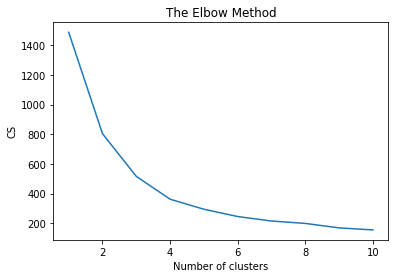

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0) 
kmeans.fit(x)

print(kmeans.inertia_)

labels = kmeans.labels_
correct_label=sum(y==labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_label,y.size))

print('Accuracy score: {0:0.2f}'. format(correct_label/float(y.size)))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


516.1807499213971
Result: 3055 out of 7050 samples were correctly labeled.
Accuracy score: 0.43


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0) 
kmeans.fit(x)

print(kmeans.inertia_)

labels = kmeans.labels_
correct_label=sum(y==labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_label,y.size))

print('Accuracy score: {0:0.2f}'. format(correct_label/float(y.size)))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


362.3433558599297
Result: 793 out of 7050 samples were correctly labeled.
Accuracy score: 0.11
